## An Analysis of The Australian Deparatment of Education's Exit Surveys
The purpose of this project is to simulate a request from a company's stakeholders to explore two questions:
1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction?  Additionally, are there any underlying reasons for a more tenured employee's departure?
2. Are younger employees resigning due to some kind of dissatisfaction?  Are older employees resigning for similar reasons?

A data dictionary has not been provided for the dataset, therefore I will infer each columns meaning.  In a professional setting, a meeting with the project's manager would be coordinated to confirm.
- **ID**: An id used to identify the participant of the survey
- **SeparationType**: The Reason why the person's employment ended
- **Cease**: Date: The year or month the person's employment ended
- **DETE**: Start Date: The year the person began employement with the DETE (Department of Education, Training and Employement)
- The instructions provided by the simulated manager were to disregard columns 28-48 and will subsequently be dropped.

In [1]:
import pandas as pd

In [2]:
dete_survey = pd.read_csv('dete-exit-survey-january-2014.csv', na_values='Not Stated')

In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

**Observations**:
- We can see that there are 55 total categories and 822 rows
- Some categories are almost entirely consisting of null values (Torres Strait, Aboriginal, Disability, NESB, etc...)
- Further examination of these rows will be required to determine if they were purposely left blank instead of missing data

**Prompt Instructrion**
- The "employer" has specified that they are not interested in columns 28-48 and therefore will be discarded from our dataset.

In [4]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

In [5]:
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

**Prompt Instruction**
- The "project manager" has requested that all columns be uniform.  Their preference is to have all columns lower case and converted to snake_case.  The code below will satisfy their standards.

In [6]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace('\s+', '_').str.strip().str.lower()

C:\Users\moore\AppData\Local\Temp\ipykernel_13316\1671676807.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dete_survey_updated.columns = dete_survey_updated.columns.str.replace('\s+', '_').str.strip().str.lower()


In [7]:
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   822 non-null    int64  
 1   separationtype                       822 non-null    object 
 2   cease_date                           788 non-null    object 
 3   dete_start_date                      749 non-null    float64
 4   role_start_date                      724 non-null    float64
 5   position                             817 non-null    object 
 6   classification                       455 non-null    object 
 7   region                               717 non-null    object 
 8   business_unit                        126 non-null    object 
 9   employment_status                    817 non-null    object 
 10  career_move_to_public_sector         822 non-null    bool   
 11  career_move_to_private_sector   

**Prompt Note**
- The purpose of this assignment is to probe survey respondents who have resigned.  The code below demonstrates that there are three different resignation categories and will need to be accounted for individually to ensure that no relevant data is dropped.

In [8]:
dete_survey_updated['separationtype'].unique()

array(['Ill Health Retirement', 'Voluntary Early Retirement (VER)',
       'Resignation-Other reasons', 'Age Retirement',
       'Resignation-Other employer',
       'Resignation-Move overseas/interstate', 'Other',
       'Contract Expired', 'Termination'], dtype=object)

In [9]:
target = ['Resignation-Other reasons','Resignation-Other employer','Resignation-Move overseas'
                                                                   '/interstate']
dete_resignation = dete_survey_updated[dete_survey_updated['separationtype'].isin(target)].copy()

**Observation**
- Now that the scope of the dataset is constrained to the request of the "employer", I will begin to explore the data to ensure that it is of the right type to manipulate.
- I immediately found that the date section was of type string and has two different methods of entry.  In order to rectify this, I will need to separate the last 4 numbers of the cell and add it to 20

In [10]:
dete_resignation['cease_date'].info()
dete_resignation['cease_date'] = dete_resignation['cease_date'].str.split('/').str[-1]
dete_resignation['cease_date'] = dete_resignation['cease_date'].astype(float)

<class 'pandas.core.series.Series'>
Int64Index: 311 entries, 3 to 821
Series name: cease_date
Non-Null Count  Dtype 
--------------  ----- 
300 non-null    object
dtypes: object(1)
memory usage: 4.9+ KB


In [11]:
print(dete_resignation['cease_date'].value_counts().sort_index(ascending=False))

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: cease_date, dtype: int64


**Observations**
- We do not need to repeat this process on the start_date column as the data is already in the format needed (demonstrated below).
- For ease of analysis I will create an additional row that contains the years of service for each employee.

In [12]:
start = dete_resignation['dete_start_date']
print(type(start.iloc[0]))

<class 'numpy.float64'>


In [13]:
service = dete_resignation['cease_date']-dete_resignation['dete_start_date']

In [14]:
dete_resignation['institute_service'] = service

In [15]:
dete_resignation['institute_service'].value_counts().sort_index(ascending=False)

49.0     1
42.0     1
41.0     1
39.0     3
38.0     1
36.0     2
35.0     1
34.0     1
33.0     1
32.0     3
31.0     1
30.0     2
29.0     1
28.0     2
27.0     1
26.0     2
25.0     2
24.0     4
23.0     4
22.0     6
21.0     3
20.0     7
19.0     3
18.0     5
17.0     6
16.0     5
15.0     7
14.0     6
13.0     8
12.0     6
11.0     4
10.0     6
9.0     14
8.0      8
7.0     13
6.0     17
5.0     23
4.0     16
3.0     20
2.0     14
1.0     22
0.0     20
Name: institute_service, dtype: int64

**Categorization**
- Now that the date sections have been cleaned and length of employment determined, we can categorize it into quantifiable bins.
- The "Data Manager" has requested that all employment be categorized as the following:
    - **New**: Less than 3 years at a company.
    - **Experienced**: 3-6 years at a company.
    - **Established**: 7-10 years at a company.
    - **Veteran**: 11 or more years at a company.
- The "Data Manager" has also requested that any dissatisfied response be converted into a new boolean column for easy analysis.  The categories can be seen in the _cats_ list.

In [16]:
def service_map(year):
    if year<3:
        val = 'New'
    elif 3<=year<=6:
        val = 'Experienced'
    elif 7<=year<=10:
        val = 'Established'
    elif 10<year:
        val = 'Veteran'
    else:
        val = 'NaN'
    return val

dete_resignation['service_cat'] = dete_resignation['institute_service'].apply(service_map)

In [17]:
print(dete_resignation['service_cat'].value_counts())
print(dete_resignation['service_cat'].value_counts().sum())

Veteran        100
Experienced     76
New             56
Established     41
NaN             38
Name: service_cat, dtype: int64
311


In [18]:
cats = ['job_dissatisfaction','dissatisfaction_with_the_department',
        'physical_work_environment','lack_of_recognition','work_location','employment_conditions','employment_conditions','work_life_balance','workload']
dete_resignation['dissatisfied'] = dete_resignation[cats].any(axis=1,skipna=False)

In [19]:
print(dete_resignation['dissatisfied'].value_counts())
print(dete_resignation['dissatisfied'].value_counts().sum())

False    167
True     144
Name: dissatisfied, dtype: int64
311


In [20]:
dete_resignation['age'].value_counts()

41-45            48
46-50            42
36-40            41
26-30            35
51-55            32
31-35            29
21-25            29
56-60            26
61 or older      23
20 or younger     1
Name: age, dtype: int64

**Explanation**
- The value counts sum has been included to ensure that there are an equal amount of values between rows that will be analyzed.

<AxesSubplot:title={'center':'Proportion of Dissatisfied Employees By Experience Level'}, xlabel='Service Category', ylabel='Proportion of Employees Dissatisfied'>

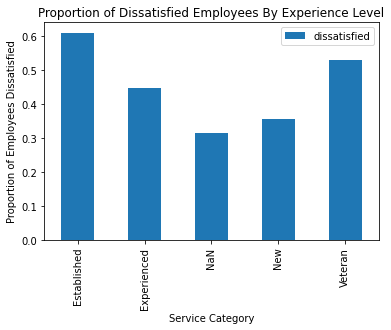

In [21]:
pivot = dete_resignation.pivot_table(values='dissatisfied', index='service_cat')
%matplotlib inline
pivot.plot(kind='bar', title='Proportion of Dissatisfied Employees By Experience Level',
           xlabel='Service Category',ylabel='Proportion of Employees Dissatisfied')

**Observation**
- From the barchart, we can see that roughly 60% of Established employees and Veteran employees are resigning due to dissatisfaction with their job.
- These findings are quite alarming and confirm our employer's suspicion that the company is losing more tenured employees due to an issue with the job itself.

<AxesSubplot:title={'center':'Proportion of Dissatisfied Employees By Age'}, xlabel='age', ylabel='Proportion of Employees Dissatisfied'>

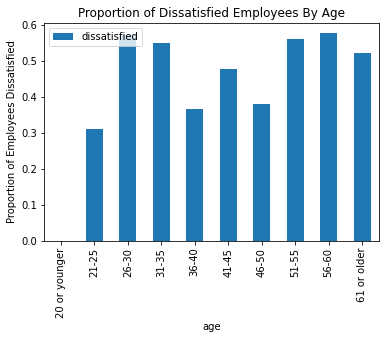

In [25]:
age_pivot = dete_resignation.pivot_table(values='dissatisfied', index='age')
%matplotlib inline
age_pivot.plot(kind='bar', title='Proportion of Dissatisfied Employees By Age',
           ylabel='Proportion of Employees Dissatisfied')

**Observations**
- Breaking down the resignations by age confirms what we saw above.  Younger employees (under 25 years old) are generally not leaving due to dissatisfaction, while older, more experienced employees are leaving due to some misgiving with the company.
- It is interesting to note that the ages associated with being established, but not veteran, at the company are more satisfied with the company upon departure than their cohorts.
- As more retire-aged employees are citing dissatisfaction, I would also recommend asking exit interview questions that probe their general satisfaction with the industry as well.  While there are always improvements that can be made within the company, general changes to the industry may also be fueling their resignations.